# Exercise: Using Sagemaker Studio for EDA in Pandas

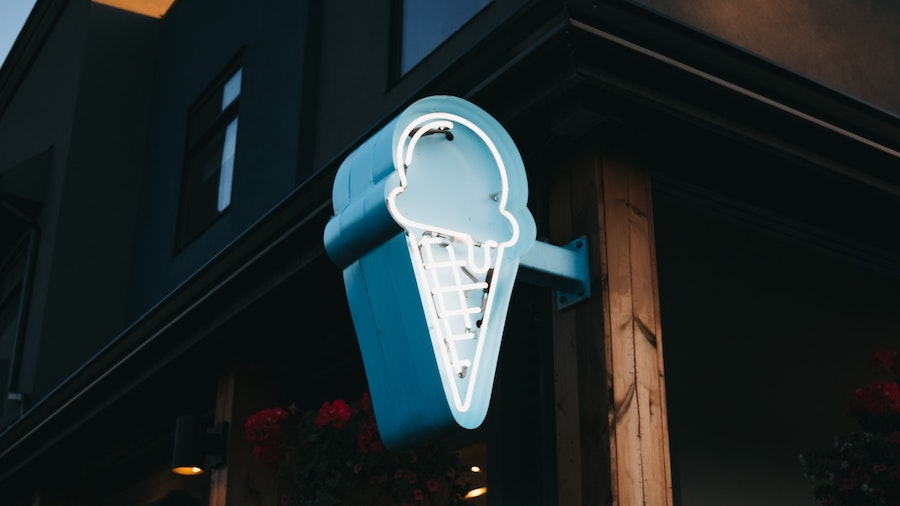

You are the happy owner of Yum Yum Ice Cream. After the last two days of amazing sales, you decided to see if you can gain any insights into your ice cream sales. Please provide the data metrics below:
* Given the dataset below, please create a pandas dataframe.
* Output the dataframe to a csv for backup.
* Output basic statistical metrics (count, mean, std, min, max, and percentiles.
* Create the correlation matrix of the 4 features.
* Create a histogram plot using pandas or matplotlib.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
dataset = [
    {"date": "2021-01-01", "ice_cream_type": 1, "topping": 1, "location": 1},
    {"date": "2021-01-01", "ice_cream_type": 2, "topping": 1, "location": 2},
    {"date": "2021-01-01", "ice_cream_type": 1, "topping": 2, "location": 2},
    {"date": "2021-01-01", "ice_cream_type": 3, "topping": 1, "location": 1},
    {"date": "2021-01-01", "ice_cream_type": 1, "topping": 2, "location": 2},
    {"date": "2021-01-01", "ice_cream_type": 1, "topping": 2, "location": 2},
    {"date": "2021-01-01", "ice_cream_type": 1, "topping": 1, "location": 1},
    {"date": "2021-01-02", "ice_cream_type": 1, "topping": 1, "location": 1},
    {"date": "2021-01-02", "ice_cream_type": 3, "topping": 3, "location": 1},
    {"date": "2021-01-02", "ice_cream_type": 3, "topping": 2, "location": 2},
    {"date": "2021-01-02", "ice_cream_type": 2, "topping": 3, "location": 2},
    {"date": "2021-01-02", "ice_cream_type": 2, "topping": 3, "location": 2},
    {"date": "2021-01-02", "ice_cream_type": 3, "topping": 1, "location": 1},
    {"date": "2021-01-02", "ice_cream_type": 1, "topping": 2, "location": 2},
]

In [87]:
# Given the dataset below, please create a pandas dataframe.
df = pd.DataFrame(dataset, columns = ['date', 'ice_cream_type', 'topping', 'location'])
df

,date,ice_cream_type,topping,location
0,2021-01-01,1,1,1
1,2021-01-01,2,1,2
2,2021-01-01,1,2,2
3,2021-01-01,3,1,1
4,2021-01-01,1,2,2
5,2021-01-01,1,2,2
6,2021-01-01,1,1,1
7,2021-01-02,1,1,1
8,2021-01-02,3,3,1
9,2021-01-02,3,2,2


In [88]:
df.rename(columns={'ice_cream_type': 'type'}, inplace=True)
df

,date,type,topping,location
0,2021-01-01,1,1,1
1,2021-01-01,2,1,2
2,2021-01-01,1,2,2
3,2021-01-01,3,1,1
4,2021-01-01,1,2,2
5,2021-01-01,1,2,2
6,2021-01-01,1,1,1
7,2021-01-02,1,1,1
8,2021-01-02,3,3,1
9,2021-01-02,3,2,2


In [89]:
# Output the dataframe to a csv for backup.
df.to_csv('icecream_data.csv', index=False)

In [90]:
# Always good to make sure your data look correct
df.head()

,date,type,topping,location
0,2021-01-01,1,1,1
1,2021-01-01,2,1,2
2,2021-01-01,1,2,2
3,2021-01-01,3,1,1
4,2021-01-01,1,2,2


In [91]:
df['datetime'] = pd.to_datetime(df['date'])
df.head(1)

,date,type,topping,location,datetime
0,2021-01-01,1,1,1,2021-01-01


In [92]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df.head(1)

,date,type,topping,location,datetime,year,month,day
0,2021-01-01,1,1,1,2021-01-01,2021,1,1


In [93]:
# Output basic statistical metrics (count, mean, std, min, max, and percentiles.
df[['type', 'topping', 'location', 'year', 'month', 'day']].describe()

,type,topping,location,year,month,day
count,14.000000,14.000000,14.000000,14.0,14.0,14.000000
mean,1.785714,1.785714,1.571429,2021.0,1.0,1.500000
std,0.892582,0.801784,0.513553,0.0,0.0,0.518875
min,1.000000,1.000000,1.000000,2021.0,1.0,1.000000
25%,1.000000,1.000000,1.000000,2021.0,1.0,1.000000
50%,1.500000,2.000000,2.000000,2021.0,1.0,1.500000
75%,2.750000,2.000000,2.000000,2021.0,1.0,2.000000
max,3.000000,3.000000,2.000000,2021.0,1.0,2.000000


In [94]:
# Create the correlation matrix of the 4 features.
correlation_mtx = df[['type', 'topping', 'location', 'year', 'month', 'day']].corr()
correlation_mtx

,type,topping,location,year,month,day
type,1.000000,0.145874,-2.157585e-01,NaN,NaN,4.152274e-01
topping,0.145874,1.000000,5.070725e-01,NaN,NaN,4.622502e-01
location,-0.215758,0.507072,1.000000e+00,NaN,NaN,1.602469e-17
year,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN
day,0.415227,0.462250,1.602469e-17,NaN,NaN,1.000000e+00


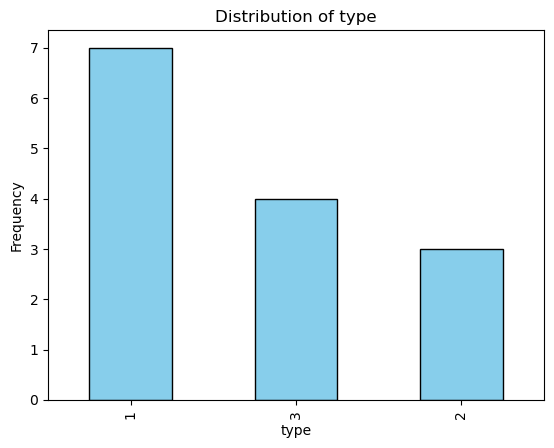

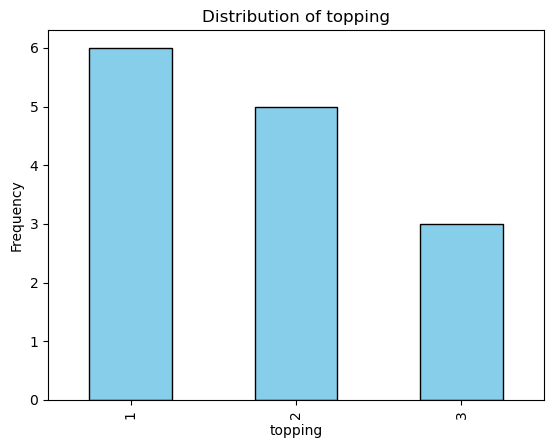

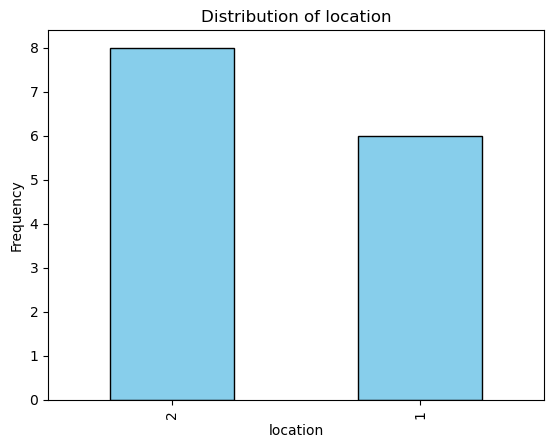

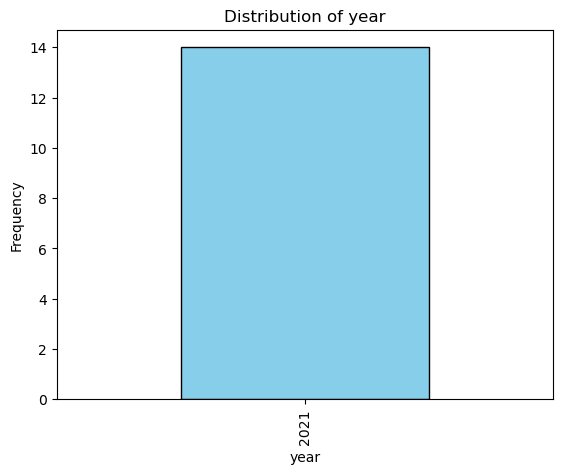

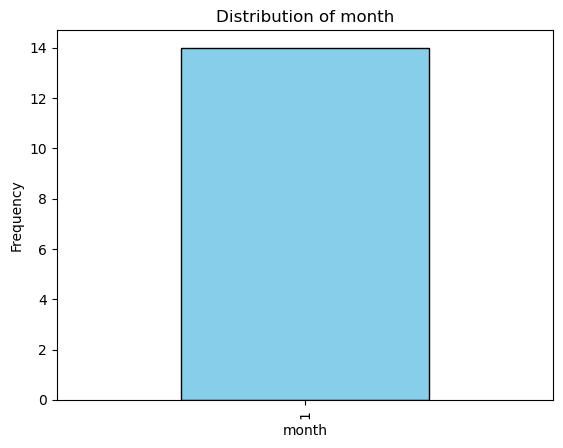

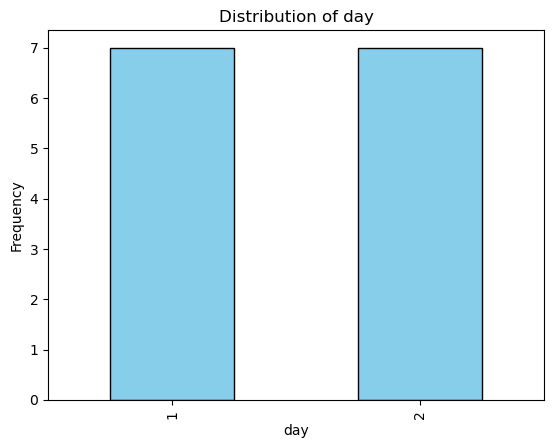

In [95]:
# Create a histogram plot using pandas or matplotlib.
for col in ['type', 'topping', 'location', 'year', 'month', 'day']:
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()